In [119]:
#For reading csv file
import pandas as pd

#For mathematical operations
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [120]:
data = pd.read_csv("Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [122]:
#Check Null Values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [123]:
data["isFraud"].unique()

array([0, 1], dtype=int64)

In [124]:
data["isFraud"].value_counts()
#We conclude the data is imbalanced and hence we need to balance it to 

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\kiran\AppData\Local\Temp\ipykernel_26796\4128208227.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


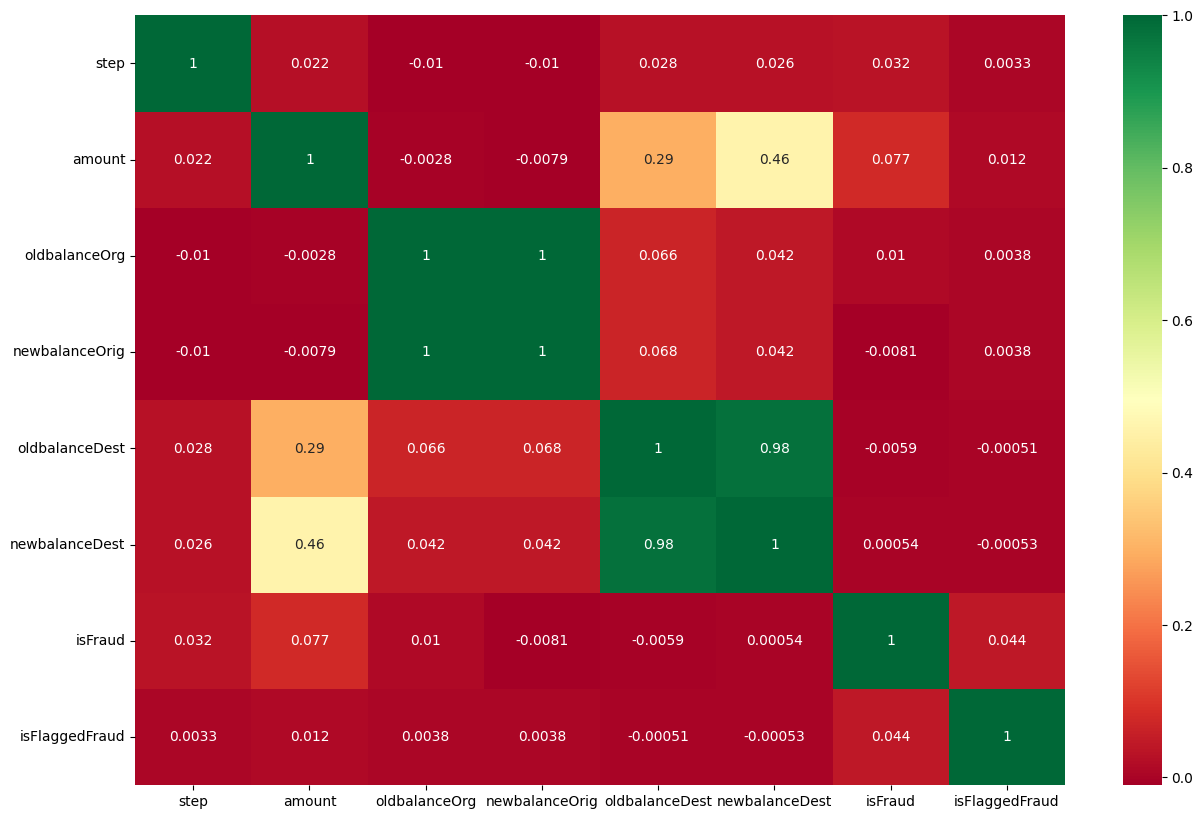

In [125]:
#Check for correlation among features
corr = data.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()
#Now , we modify few things to improve color like cmap = "RdYlGn" and annot = "True"


In [126]:
#Observations from above graph - Oldbalancedest and new balance dest are correlated, so drop 1
#oldbalancedest is highly negatively correlated with target as opposed to newbalancedest , hence drop newbalancedest
#simillary , drop oldbalanceorg

In [127]:
#Visualize distributions
data["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

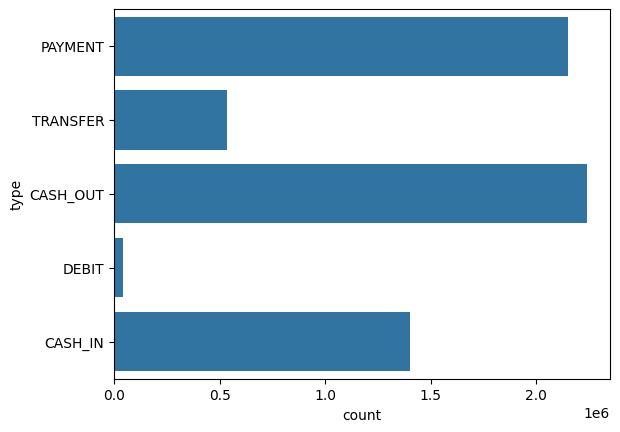

In [128]:
sns.countplot(data["type"])
plt.show()


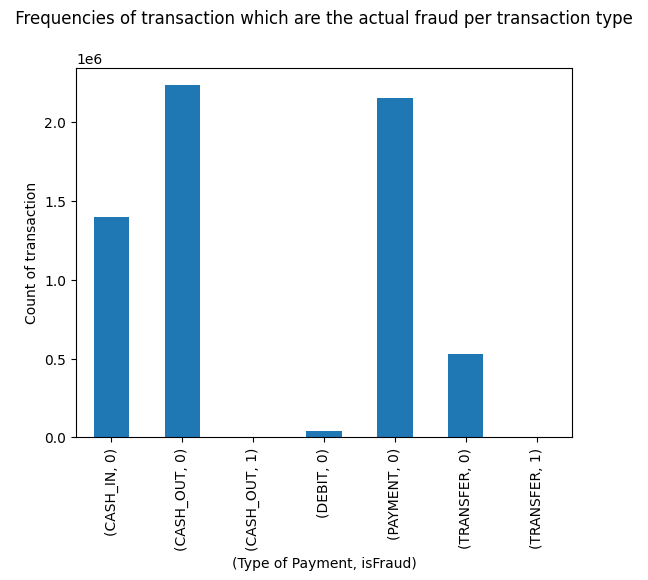

In [129]:
fraud_type = data.groupby(['type', 'isFraud']).size().plot(kind='bar')

fraud_type.set_title(" Frequencies of transaction which are the actual fraud per transaction type \n" )
fraud_type.set_xlabel("(Type of Payment, isFraud)")
fraud_type.set_ylabel("Count of transaction")

plt.show()

Text(0.5, 0, 'Transaction Type')

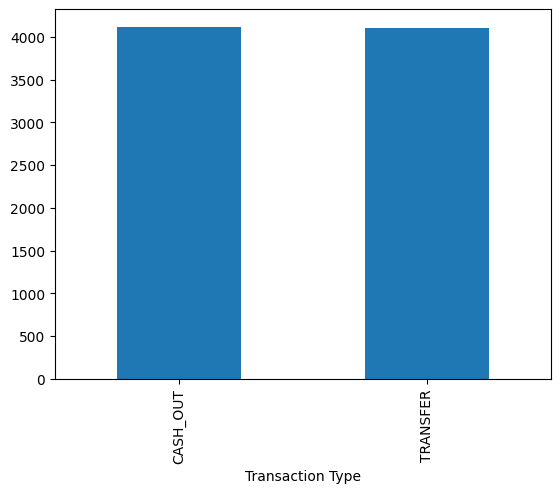

In [130]:
fraud = data["isFraud"].isin([1])
fraud_time = data[fraud].groupby(['type']).size().plot(kind='bar')
fraud_time.set_xlabel("Transaction Type")

In [131]:
#Hence we can say only cashout and transfer type can be fraudulent. So change everything else to other.
data["type"].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [132]:
type_map = {'PAYMENT':"OTHER", 
            'TRANSFER':"TRANSFER", 
            'CASH_OUT':"CASH_OUT", 
            'DEBIT':"OTHER", 
            'CASH_IN':"OTHER"}

data["type"] = data["type"].map(type_map)

In [133]:
data["type"].value_counts()

OTHER       3592211
CASH_OUT    2237500
TRANSFER     532909
Name: type, dtype: int64

In [134]:
#To get names of columns
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [135]:
#Check fraud by calculating mismatch in balance at origin and destination after transaction.
data["inacc_origin"] = (data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"]).astype(int)
data["inacc_dest"] = (data["oldbalanceDest"] + data["amount"] != data["newbalanceDest"]).astype(int)



In [136]:
data["inacc_dest"].value_counts()

1    4736674
0    1625946
Name: inacc_dest, dtype: int64

In [137]:
print("Balance Error(%) at the origin:",round(data['inacc_origin'].value_counts()[1]/data.shape[0] * 100))

print("Balance Error(%) at the destination:",round(data['inacc_dest'].value_counts()[1]/data.shape[0] * 100))

Balance Error(%) at the origin: 85
Balance Error(%) at the destination: 74


In [138]:
#Check if any transaction amount = 0 or < 0
print("Amount < 0")
x = len(data[data["amount"] < 0])
print(x)

print("Amount = 0")
y = len(data[data["amount"] == 0])
print(y)

Amount < 0
0
Amount = 0
16


In [139]:
#now these 16 you check , what kind of transaction and if fraud
data[data["amount"] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,inacc_origin,inacc_dest
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0,0,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0,0,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0,0,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0,0,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0,0,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0,0,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0,0,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0,0,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0,0,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0,0,0


In [140]:
#All are cashout and all are fraud, but are not flagged as fraud
#now check if all flagged are fraud or not

data[data["isFlaggedFraud"] == 1]
#As seen , all flagged fraud are tranfer types and are fraud.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,inacc_origin,inacc_dest
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1,1,1


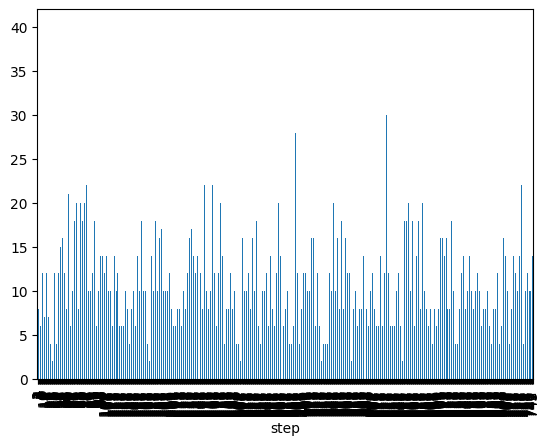

In [141]:
#check variation of prediction variable with respect to Step column
stepcheck = data[data["isFraud"]==1]
fraud_time = stepcheck.groupby(["step"]).size()
fraud_time.plot(kind="bar")
plt.show()
#We see a pretty even distribution , not really any pattern or clustering , hence we can discard this column as well.

In [142]:
#Now lets drop columns that dont really matter to say if fraud or not - ['step', 'nameOrig', 'oldbalanceOrg',
#'nameDest', 'newbalanceDest', 'isFraud','isFlaggedFraud']
#oldbalanceorg and newbalancedest is removed due to correlation , calculated above.

X = data.drop(columns = ['step', 'nameOrig', 'oldbalanceOrg','nameDest', 'newbalanceDest', 'isFraud','isFlaggedFraud'])
X.head()


,type,amount,newbalanceOrig,oldbalanceDest,inacc_origin,inacc_dest
0,OTHER,9839.64,160296.36,0.0,0,1
1,OTHER,1864.28,19384.72,0.0,0,1
2,TRANSFER,181.00,0.00,0.0,0,1
3,CASH_OUT,181.00,0.00,21182.0,0,1
4,OTHER,11668.14,29885.86,0.0,0,1


In [143]:
y = data["isFraud"]


In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [145]:

#from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score


# Model
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier

In [146]:
#onehot encoding

additioncolumns = pd.get_dummies(X_train["type"],prefix="type",drop_first=True)
X_train = pd.concat([X_train,additioncolumns],axis=1)
X_train.head()

,type,amount,newbalanceOrig,oldbalanceDest,inacc_origin,inacc_dest,type_OTHER,type_TRANSFER
1186641,OTHER,186994.49,191974.49,2565463.66,1,1,1,0
1199598,CASH_OUT,86377.61,0.00,0.00,1,0,0,0
1185636,CASH_OUT,215489.19,0.00,6345756.55,1,1,0,0
6211424,TRANSFER,697319.21,0.00,2150239.95,1,0,0,1
4452703,OTHER,59243.58,0.00,0.00,1,1,1,0


In [147]:
#simillarly for testdata
additioncolumns = pd.get_dummies(X_test["type"],prefix="type",drop_first=True)
X_test = pd.concat([X_test,additioncolumns],axis=1)
X_test.head()

,type,amount,newbalanceOrig,oldbalanceDest,inacc_origin,inacc_dest,type_OTHER,type_TRANSFER
3737323,OTHER,330218.42,351084.42,452419.57,1,1,1,0
264914,OTHER,11647.08,18722.92,0.00,0,1,1,0
85647,OTHER,152264.21,258853.21,201303.01,1,1,1,0
5899326,TRANSFER,1551760.63,0.00,3198359.45,1,0,0,1
2544263,OTHER,78172.30,2999503.88,415821.90,1,1,1,0


In [155]:
X_train = X_train.drop(columns = ["type"])
X_test = X_test.drop(columns = ["type"])

In [156]:
X_train.dtypes

amount            float64
newbalanceOrig    float64
oldbalanceDest    float64
inacc_origin        int32
inacc_dest          int32
type_OTHER          uint8
type_TRANSFER       uint8
dtype: object

In [157]:
#MODELLING
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight="balanced")
model = LR.fit(X_train,y_train)


In [158]:
y_pred = model.predict(X_test)

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62   2096999
           1       0.00      0.92      0.00      2666

    accuracy                           0.44   2099665
   macro avg       0.50      0.68      0.31   2099665
weighted avg       1.00      0.44      0.61   2099665



In [164]:
#use randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced")
rfmodel = rf.fit(X_train,y_train)


KeyboardInterrupt: 

In [165]:
#Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_estimators' : [50,100,130,150],
    'max_depth' : [4,5,1,2,None],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,4,10,20],
    'max_leaf_nodes' : [2,5,10,None]  
}

rf_rs = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=5)


In [166]:
rf_best_model = rf_rs.fit(X_train, y_train)
rf_best_model.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
y_pred = rf_best_model.predict(X_test)
print(classification_report(y_test, y_pred))
